In [9]:
import nflfastpy as npy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
def completed_passes(player_name, year):
    df = npy.load_pbp_data(year)
    return df.loc[(df["name"] == player_name) & (df["season_type"] == "REG") & (df["complete_pass"] == 1)]

In [3]:
team_logo_df = npy.load_team_logo_data()

In [4]:
df_qb = completed_passes("P.Mahomes", 2019)

In [5]:
df_qb

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,receiver_id,name,jersey_number,id,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd
1656,79,2019_01_KC_JAX,2019090802,JAX,KC,REG,1,KC,away,JAX,...,32013030-2d30-3033-3330-3430e890f1ff,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,0.666073,0.666356,3.447102,2.0,0.997684,0.294608
1657,103,2019_01_KC_JAX,2019090802,JAX,KC,REG,1,KC,away,JAX,...,32013030-2d30-3033-3133-32353107e672,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,6.564431,0.466642,6.361401,2.0,0.999425,0.999425
1664,251,2019_01_KC_JAX,2019090802,JAX,KC,REG,1,KC,away,JAX,...,32013030-2d30-3033-3035-3036654ef292,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,2.956683,0.469557,6.233610,3.0,1.000000,1.000000
1665,275,2019_01_KC_JAX,2019090802,JAX,KC,REG,1,KC,away,JAX,...,32013030-2d30-3033-3133-32353107e672,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,1.354209,0.356193,4.398920,2.0,1.000000,1.000000
1667,320,2019_01_KC_JAX,2019090802,JAX,KC,REG,1,KC,away,JAX,...,32013030-2d30-3033-3038-3734bb46867c,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,-0.525025,1.183730,4.318888,4.0,0.615432,0.500712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44373,1267,2019_17_LAC_KC,2019122908,KC,LAC,REG,17,KC,home,LAC,...,32013030-2d30-3033-3038-3734bb46867c,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,-0.493791,0.577630,12.115425,11.0,0.196020,0.029343
44382,1491,2019_17_LAC_KC,2019122908,KC,LAC,REG,17,KC,home,LAC,...,32013030-2d30-3033-3531-343087bd8daf,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,2.976271,0.995641,8.828771,5.0,1.000000,1.000000
44383,1515,2019_17_LAC_KC,2019122908,KC,LAC,REG,17,KC,home,LAC,...,32013030-2d30-3033-3237-373580910f3e,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,3.066152,NaN,NaN,NaN,NaN,NaN
44439,2790,2019_17_LAC_KC,2019122908,KC,LAC,REG,17,KC,home,LAC,...,32013030-2d30-3033-3330-3430e890f1ff,P.Mahomes,15.0,32013030-2d30-3033-3338-3733fa30c4fa,-0.379425,0.728135,5.494341,4.0,0.548633,0.227070


In [6]:
df_qb = df_qb.loc[df_qb["air_yards"] > 0]

In [7]:
df_qb["air_yards"].mean()

10.482142857142858

In [10]:
plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 22
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["xtick.major.width"] = 2

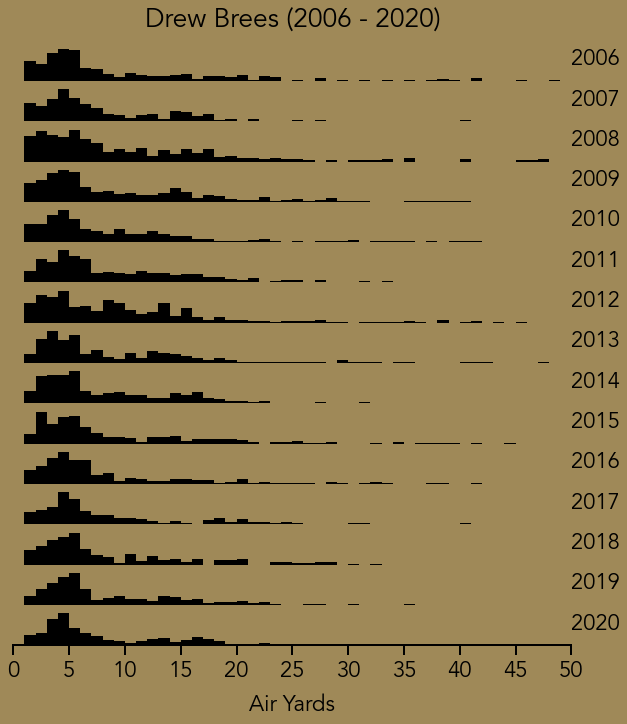

In [26]:
player_name = "D.Brees"
years = [i for i in range(2006, 2021, 1)]
team_logo_data = team_logo_df.loc[team_logo_df["team_abbr"] == "NO"]
color2 = team_logo_data["team_color"].values[0]
color1 = team_logo_data["team_color2"].values[0]

fig, axes = plt.subplots(len(years), 1, figsize=(10, 11), facecolor=color2)

for i, year in enumerate(years):
    ax = axes[i]
    ax.set_facecolor(color2)
    df = completed_passes(player_name, year)
    df = df.loc[df["air_yards"] > 0]
    bins = [i for i in range(0, 51, 1)]
    ax.hist(df["air_yards"], bins=bins, color=color1)
    ax.text(1, 1, year, ha="left", va="top", color=color1, transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 50)
    ax.set_ylim(bottom=-0.01)
    
# Update bottom axis
bottom_axis = axes[-1]
bottom_axis.spines["bottom"].set_visible(True)
bottom_axis.spines["bottom"].set_color(color1)
bottom_axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
bottom_axis.tick_params(axis="x", color=color1, labelcolor=color1)
bottom_axis.set_xlabel("Air Yards", color=color1, labelpad=10)

# Set title
axes[0].set_title(f"Drew Brees ({years[0]} - {years[-1]})", pad=20, color=color1)

plt.savefig("drew_brees.png", dpi=300, bbox_inches="tight")
plt.show()

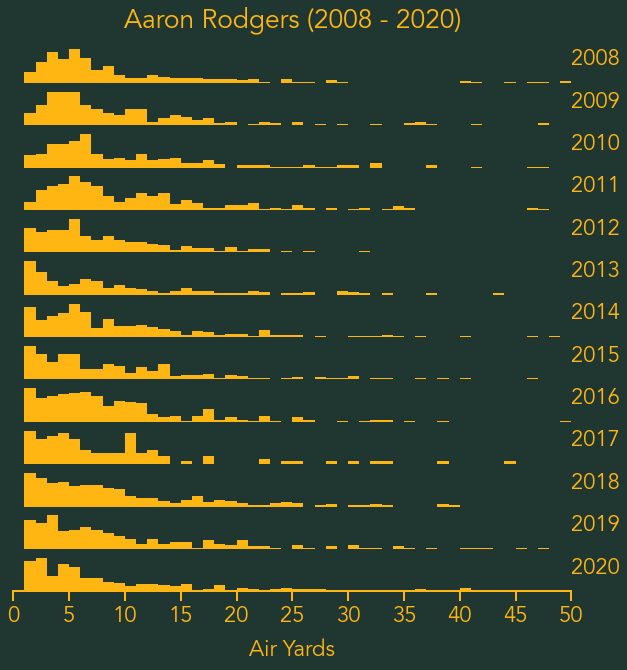

In [25]:
player_name = "A.Rodgers"
years = [i for i in range(2008, 2021, 1)]
team_logo_data = team_logo_df.loc[team_logo_df["team_abbr"] == "GB"]
color2 = team_logo_data["team_color"].values[0]
color1 = team_logo_data["team_color2"].values[0]

fig, axes = plt.subplots(len(years), 1, figsize=(10, 10), facecolor=color2)

for i, year in enumerate(years):
    ax = axes[i]
    ax.set_facecolor(color2)
    df = completed_passes(player_name, year)
    df = df.loc[df["air_yards"] > 0]
    bins = [i for i in range(0, 51, 1)]
    ax.hist(df["air_yards"], bins=bins, color=color1)
    ax.text(1, 1, year, ha="left", va="top", color=color1, transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 50)
    ax.set_ylim(bottom=-0.01)
    
# Update bottom axis
bottom_axis = axes[-1]
bottom_axis.spines["bottom"].set_visible(True)
bottom_axis.spines["bottom"].set_color(color1)
bottom_axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
bottom_axis.tick_params(axis="x", color=color1, labelcolor=color1)
bottom_axis.set_xlabel("Air Yards", color=color1, labelpad=10)

# Set title
axes[0].set_title(f"Aaron Rodgers ({years[0]} - {years[-1]})", pad=20, color=color1)

plt.savefig("aaron_rodgers.png", dpi=300, bbox_inches="tight")
plt.show()

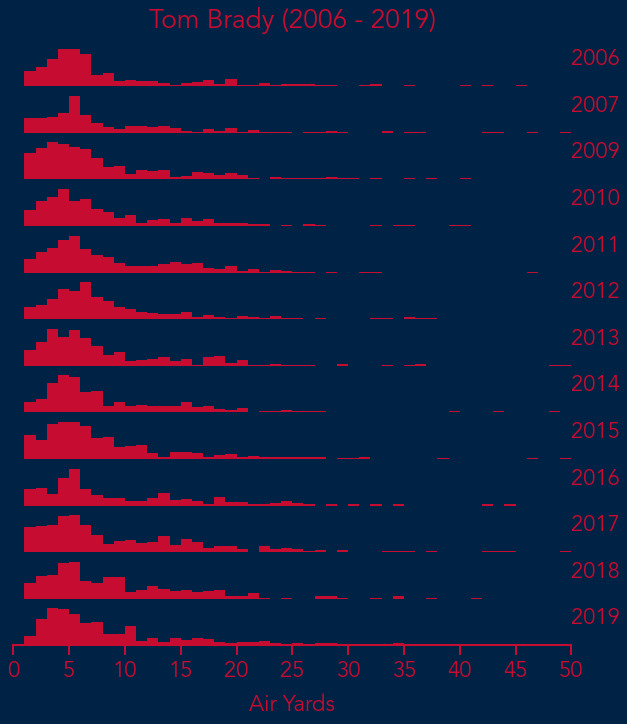

In [65]:
player_name = "T.Brady"
years = [2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
team_logo_data = team_logo_df.loc[team_logo_df["team_abbr"] == "NE"]
color2 = team_logo_data["team_color"].values[0]
color1 = team_logo_data["team_color2"].values[0]

fig, axes = plt.subplots(len(years), 1, figsize=(10, 11), facecolor=color2)

for i, year in enumerate(years):
    ax = axes[i]
    ax.set_facecolor(color2)
    df = completed_passes(player_name, year)
    df = df.loc[df["air_yards"] > 0]
    bins = [i for i in range(0, 51, 1)]
    ax.hist(df["air_yards"], bins=bins, color=color1)
    ax.text(1, 1, year, ha="left", va="top", color=color1, transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 50)
    ax.set_ylim(bottom=-0.01)
    
# Update bottom axis
bottom_axis = axes[-1]
bottom_axis.spines["bottom"].set_visible(True)
bottom_axis.spines["bottom"].set_color(color1)
bottom_axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
bottom_axis.tick_params(axis="x", color=color1, labelcolor=color1)
bottom_axis.set_xlabel("Air Yards", color=color1, labelpad=10)

# Set title
axes[0].set_title(f"Tom Brady ({years[0]} - {years[-1]})", pad=20, color=color1)

plt.savefig("tom_brady.png", dpi=300, bbox_inches="tight")
plt.show()

In [59]:
df = npy.load_pbp_data(2005)

In [60]:
df.loc[df["name"] == "T.Brady"]

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,receiver_id,name,jersey_number,id,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd
1779,237,2005_01_OAK_NE,2005090800,NE,LV,REG,1,NE,home,LV,...,32013030-2d30-3032-3131-3932b4b3b9f1,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,-0.488391,NaN,NaN,NaN,NaN,NaN
1781,277,2005_01_OAK_NE,2005090800,NE,LV,REG,1,NE,home,LV,...,32013030-2d30-3032-3239-3433af8a4c03,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,2.323456,NaN,NaN,NaN,NaN,NaN
1782,298,2005_01_OAK_NE,2005090800,NE,LV,REG,1,NE,home,LV,...,32013030-2d30-3032-3131-353440d2ef10,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,-0.440703,NaN,NaN,NaN,NaN,NaN
1784,338,2005_01_OAK_NE,2005090800,NE,LV,REG,1,NE,home,LV,...,32013030-2d30-3032-3239-3433af8a4c03,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,3.158398,NaN,NaN,NaN,NaN,NaN
1787,401,2005_01_OAK_NE,2005090800,NE,LV,REG,1,NE,home,LV,...,00-0021353,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,-1.211684,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46438,2998,2005_19_NE_DEN,2006011401,DEN,NE,POST,19,NE,away,DEN,...,00-0002068,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,-1.217124,NaN,NaN,NaN,NaN,NaN
46453,3332,2005_19_NE_DEN,2006011401,DEN,NE,POST,19,NE,away,DEN,...,32013030-2d30-3032-3131-3932b4b3b9f1,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,5.111823,NaN,NaN,NaN,NaN,NaN
46454,3358,2005_19_NE_DEN,2006011401,DEN,NE,POST,19,NE,away,DEN,...,00-0021353,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,1.287385,NaN,NaN,NaN,NaN,NaN
46468,3646,2005_19_NE_DEN,2006011401,DEN,NE,POST,19,NE,away,DEN,...,00-0021353,T.Brady,NaN,32013030-2d30-3031-3935-39361b587621,-0.405174,NaN,NaN,NaN,NaN,NaN


In [29]:
for column in df.columns:
    print(column)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_ho